<a href="https://colab.research.google.com/github/N1colasFD/mixed-analytics-for-data-Science/blob/main/Word_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
import pandas as pd 
import seaborn as sns
from pandas.io.json import json_normalize
import requests
import urllib.request, json 
import requests
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

#Display 6 registros
pd.options.display.min_rows = 4

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Programacion/Bases de datos/world_population.csv')
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [35]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [37]:
df.sort_values(by = 'Rank')

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00
226,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.00


In [38]:
df['World Population Percentage'].sum()

99.93

In [39]:
df.rename(columns = {'2022 Population':'world_2022_population',
                     '2020 Population':'2020_population',
                     '2015 Population':'2015_population',
                     '2010 Population':'2010_population',
                     '2000 Population':'2000_population',
                     '1990 Population':'1990_population',
                     '1980 Population':'1980_population',
                     '1970 Population':'1970_population',
                     'Growth Rate':'growth_rate',
                     'World Population Percentage':'World_Population_Percentage'}, inplace = True)

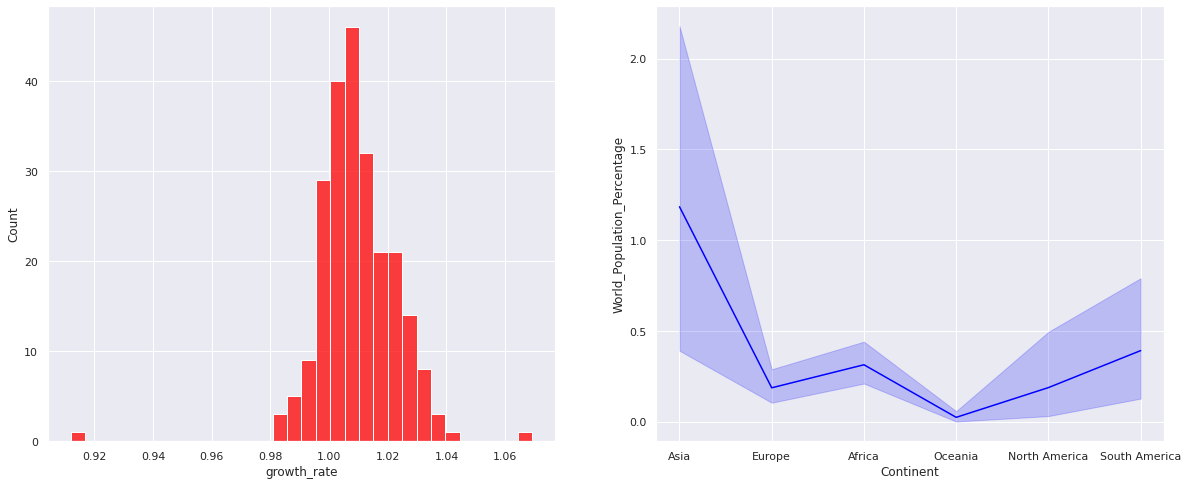

In [40]:
from locale import normalize
f, ax = plt.subplots(1,2, figsize = (20,8))
sns.set(font_scale=1, palette= "Reds")

sns.histplot(ax= ax[0], data = df, x = 'growth_rate', color = 'red')
sns.lineplot(ax= ax[1], data = df, x = 'Continent', y = 'World_Population_Percentage' , color = 'blue' );

In [41]:
df.loc[df['Country/Territory'] == 'Colombia']

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,1141748,45.4339,1.0069,0.65


In [42]:
df.loc[df['world_2022_population'] == 510]

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage
226,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0,0.998,0.0


In [43]:
df['world_2022_population'].sum()

7973413042

In [44]:
df['Tt_Growth_22_20'] = df['world_2022_population'] - df['2020_population']
df['Tt_Growth_22_70'] = df['world_2022_population'] - df['1970_population']

In [45]:
df.sort_values(by = "Tt_Growth_22_70", ascending = False)

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Tt_Growth_22_20,Tt_Growth_22_70
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,20786046,859671872
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,957556,603352887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09,-197222,-1800997
218,38,UKR,Ukraine,Kiev,Europe,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.9120,0.50,-4207927,-7577347


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   world_2022_population        234 non-null    int64  
 6   2020_population              234 non-null    int64  
 7   2015_population              234 non-null    int64  
 8   2010_population              234 non-null    int64  
 9   2000_population              234 non-null    int64  
 10  1990_population              234 non-null    int64  
 11  1980_population              234 non-null    int64  
 12  1970_population              234 non-null    int64  
 13  Area (km²)          

In [47]:
largo = df.melt(id_vars = 'Rank',
         value_vars = ['Density (per km²)','world_2022_population','Capital','growth_rate','World_Population_Percentage']).sort_values('Rank' , ascending =True)

largo

,Rank,variable,value
743,1,growth_rate,1.0
41,1,Density (per km²),146.8933
...,...,...,...
226,234,Density (per km²),510.0
460,234,world_2022_population,510


In [51]:
df.shape

(234, 22)

In [56]:
df.nlargest(n = 3, columns = 'world_2022_population')

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,...,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Tt_Growth_22_20,Tt_Growth_22_70,Acum_lag_1,Menor_100M,Mayor_100M
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,...,822534450,9706961,146.8933,1.0000,17.88,957556,603352887,2,0,0
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,...,557501301,3287590,431.0675,1.0068,17.77,20786046,859671872,2,0,0
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,...,200328340,9372610,36.0935,1.0038,4.24,2347854,137961517,2,0,0


In [60]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,...,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Tt_Growth_22_20,Tt_Growth_22_70,Acum_lag_1,Menor_100M,Mayor_100M
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,10752971,652230,63.0587,1.0257,0.52,2156541,30375800,2,1,1
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,2324731,28748,98.8702,0.9957,0.04,-24528,517590,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,...,4281671,752612,26.5976,1.0280,0.25,1089960,15736004,2,1,1
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,...,5202918,390757,41.7665,1.0204,0.20,650871,11117619,2,1,1


In [68]:
#Minicub
Dimensiones = ['world_2022_population','2020_population']
Metricas =  ['growth_rate']

Minicub = (df[Dimensiones + Metricas].melt(id_vars = 'growth_rate')  #transaccional 
 .groupby(['variable','value']).growth_rate.agg(conteo = 'count', suma  = 'sum') #como en conteno siempre es 1
 .assign(media = lambda x: x.suma / x.conteo) 
)

Minicub.head(20)

conteo    suma   media
variable        value                        
2020_population 520         1  0.9980  0.9980
                1827        1  1.0119  1.0119
                1942        1  0.9985  0.9985
                3747        1  1.0043  1.0043
                4500        1  0.9939  0.9939
                5906        1  0.9964  0.9964
                10681       1  1.0098  1.0098
                11069       1  1.0096  1.0096
                11655       1  0.9953  0.9953
                12315       1  1.0125  1.0125
                15585       1  1.0066  1.0066
                17029       1  1.0005  1.0005
                17972       1  1.0017  1.0017
                30910       1  1.0059  1.0059
                32552       1  0.9951  0.9951
                32709       1  0.9994  0.9994
                34007       1  0.9975  0.9975
                36922       1  0.9941  0.9941
                38756       1  1.0074  1.0074
                43413       1  0.9886  0.9886

In [ ]:
Minicub.media.nlargest()

variable               value     
2000_population        1264099069    17.88
2010_population        1348191368    17.88
2015_population        1393715448    17.88
2020_population        1424929781    17.88
world_2022_population  1425887337    17.88
Name: media, dtype: float64

In [72]:
Minicub.reset_index(inplace =True)

In [73]:
Minicub

,variable,value,conteo,suma,media
0,2020_population,520,1,0.9980,0.9980
1,2020_population,1827,1,1.0119,1.0119
...,...,...,...,...,...
466,world_2022_population,1417173173,1,1.0068,1.0068
467,world_2022_population,1425887337,1,1.0000,1.0000


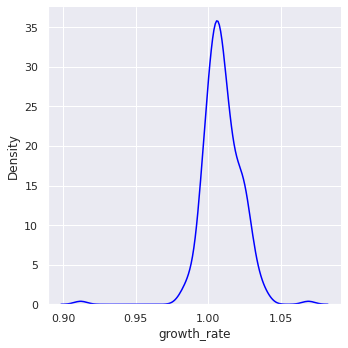

In [71]:
sns.displot(data = df, x = 'growth_rate',
           kind = 'kde',color = 'blue');

#modelo Predictivo

# Analisis de Pareto

In [76]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,world_2022_population,2020_population,2015_population,2010_population,2000_population,...,1970_population,Area (km²),Density (per km²),growth_rate,World_Population_Percentage,Tt_Growth_22_20,Tt_Growth_22_70,Acum_lag_1,Menor_100M,Mayor_100M
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,10752971,652230,63.0587,1.0257,0.52,2156541,30375800,2,1,1
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,2324731,28748,98.8702,0.9957,0.04,-24528,517590,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,...,4281671,752612,26.5976,1.0280,0.25,1089960,15736004,2,1,1
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,...,5202918,390757,41.7665,1.0204,0.20,650871,11117619,2,1,1


In [78]:
# 1. Agregar para conseguir la tabla de partida
wpp = df.groupby('world_2022_population')[['World_Population_Percentage']].sum()
wpp

,World_Population_Percentage
world_2022_population,
510,0.00
1871,0.00
...,...
1417173173,17.77
1425887337,17.88


In [ ]:
# 2. Ordenar en descendente por la métrica de interés
wpp.sort_values('World Population Percentage', ascending = False, inplace = True)
wpp

,World Population Percentage
2022_population,
1425887337,17.88
1417173173,17.77
...,...
84519,0.00
510,0.00


In [ ]:
# 3. Crear una variable con la posición, siendo 1 el mayor valor y aumentando secuencialmente hasta llegar al menor valor

wpp['Posicion'] = np.arange(start = 1, stop = len(wpp) + 1)
wpp

,World Population Percentage,Posicion
2022_population,,
1425887337,17.88,1
1417173173,17.77,2
...,...,...
84519,0.00,233
510,0.00,234


In [ ]:
# 4. Crear una variable con la posición en porcentaje, dividiendo cada posición por el total de registros

wpp['Posicion_Porc'] = wpp.Posicion.transform(lambda x: x / wpp.shape[0] * 100)
wpp

,World Population Percentage,Posicion,Posicion_Porc
2022_population,,,
1425887337,17.88,1,0.427350
1417173173,17.77,2,0.854701
...,...,...,...
84519,0.00,233,99.572650
510,0.00,234,100.000000


In [ ]:
# 5. Crear una variable con la suma acumulada del valor
wpp['Acum'] = wpp['World Population Percentage'].cumsum()
wpp

,World Population Percentage,Posicion,Posicion_Porc,Acum
2022_population,,,,
1425887337,17.88,1,0.427350,17.88
1417173173,17.77,2,0.854701,35.65
...,...,...,...,...
84519,0.00,233,99.572650,99.93
510,0.00,234,100.000000,99.93


In [ ]:
# 6. Crear una variable con el acumulado en porcentaje, dividiendo cada valor por el máximo del acumulado
wpp['Acum_Porc'] = wpp.Acum.transform(lambda x: x / max(wpp.Acum) * 100)
wpp

,World Population Percentage,Posicion,Posicion_Porc,Acum,Acum_Porc
2022_population,,,,,
1425887337,17.88,1,0.427350,17.88,17.892525
1417173173,17.77,2,0.854701,35.65,35.674972
...,...,...,...,...,...
84519,0.00,233,99.572650,99.93,100.000000
510,0.00,234,100.000000,99.93,100.000000


In [ ]:
# 7. Por claridad quedarnos solo con las variables index, posición en porcentaje y acumulado en porcentaje
wpp = wpp[['Posicion_Porc','Acum_Porc']]
wpp

,Posicion_Porc,Acum_Porc
2022_population,,
1425887337,0.427350,17.892525
1417173173,0.854701,35.674972
...,...,...
84519,99.572650,100.000000
510,100.000000,100.000000


In [ ]:
wpp.Posicion_Porc.values

array([  0.42735043,   0.85470085,   1.28205128,   1.70940171,
         2.13675214,   2.56410256,   2.99145299,   3.41880342,
         3.84615385,   4.27350427,   4.7008547 ,   5.12820513,
         5.55555556,   5.98290598,   6.41025641,   6.83760684,
         7.26495726,   7.69230769,   8.11965812,   8.54700855,
         8.97435897,   9.4017094 ,   9.82905983,  10.25641026,
        10.68376068,  11.11111111,  11.53846154,  11.96581197,
        12.39316239,  12.82051282,  13.24786325,  13.67521368,
        14.1025641 ,  14.52991453,  14.95726496,  15.38461538,
        15.81196581,  16.23931624,  16.66666667,  17.09401709,
        17.52136752,  17.94871795,  18.37606838,  18.8034188 ,
        19.23076923,  19.65811966,  20.08547009,  20.51282051,
        20.94017094,  21.36752137,  21.79487179,  22.22222222,
        22.64957265,  23.07692308,  23.5042735 ,  23.93162393,
        24.35897436,  24.78632479,  25.21367521,  25.64102564,
        26.06837607,  26.4957265 ,  26.92307692,  27.35

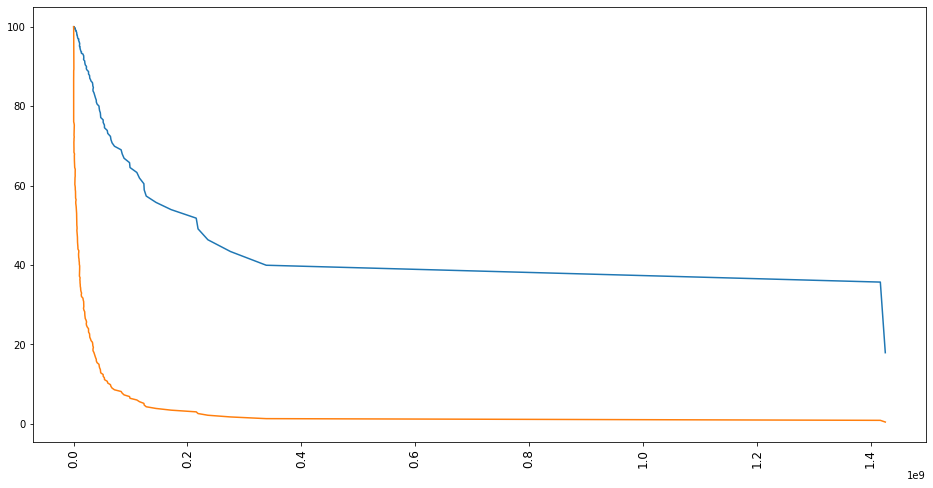

In [ ]:
# 8. Visualizarlo en un gráfico

f, ax = plt.subplots(figsize = (16,8))
ax.plot(wpp.index, wpp.Acum_Porc)
ax.plot(wpp.index, wpp.Posicion_Porc)
ax.tick_params(axis='x', labelsize=12, labelrotation=45)

In [ ]:
def Apply_pareto(wpp, salida = 'tabla'):
    #Ordenar en descendente y pasar a dataframe
    pareto = wpp.sort_values(ascending = False).to_frame()
    #Cambiar el nombre a la variable
    pareto.columns = ['World Population Percentage']
    #Crear la posición
    pareto['Posicion'] = np.arange(start = 1, stop = len(pareto) + 1)
    pareto['Posicion_Porc'] = pareto.Posicion.transform(lambda x: x / pareto.shape[0] * 100)
    #Crear el acumulado
    pareto['Acum'] = pareto['World Population Percentage'].cumsum()
    max_pareto_acum = max(pareto.Acum)
    pareto['Acum_Porc'] = pareto.Acum.transform(lambda x: x / max_pareto_acum * 100)
    #Simplificar
    pareto = pareto[['Posicion_Porc','Acum_Porc']]
    
    #Devolver la salida
    if salida == 'grafico':
        f, ax = plt.subplots(figsize = (16,8))
        ax.plot(pareto.Posicion_Porc, pareto.Acum_Porc)
        ax.plot(pareto.Posicion_Porc, pareto.Posicion_Porc)
        ax.tick_params(axis='x', labelsize=12, labelrotation=90)
        return(ax)
    else:
        return(pareto)

In [ ]:
taza_analisis = df.groupby('2022_population')[['World Population Percentage']].sum()
taza_analisis 

,World Population Percentage
2022_population,
510,0.00
1871,0.00
...,...
1417173173,17.77
1425887337,17.88


In [ ]:
#Llamamos la función para que nos devuelva la tabla con el Pareto
Apply_pareto(taza_analisis['World Population Percentage'])

,Posicion_Porc,Acum_Porc
2022_population,,
1425887337,0.427350,17.892525
1417173173,0.854701,35.674972
...,...,...
84519,99.572650,100.000000
510,100.000000,100.000000


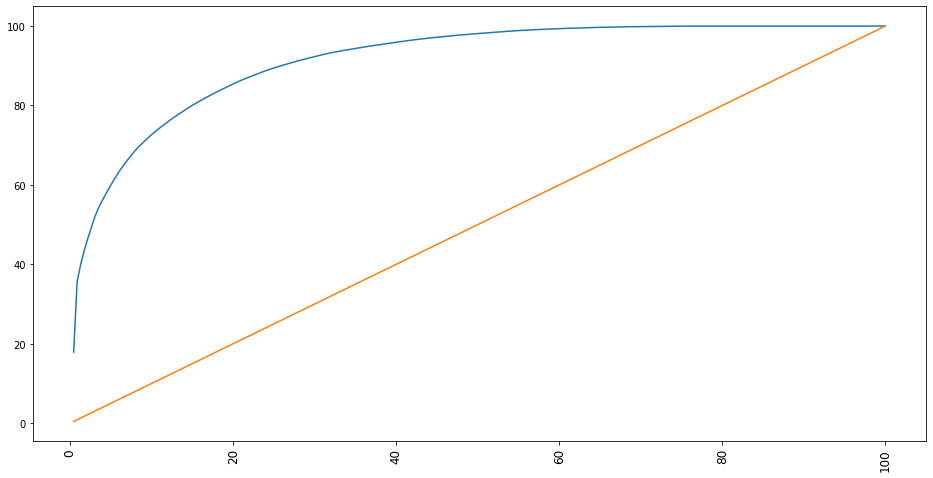

In [ ]:
#Y ahora le pedimos el gráfico
Apply_pareto(taza_analisis['World Population Percentage'], salida = 'grafico');

In [ ]:
kaggle datasets download -d brandonconrady/minecraft-composting-dataset

SyntaxError: ignored